In [1]:
!pip install endecrypt

  Using cached endecrypt-1.9-py3-none-any.whl (10 kB)


In [2]:
# imports
import numpy as np
import pandas as pd
from numpy import random
import scipy
import matplotlib.pyplot as plt
import math
import endecrypt # might need to download this module
import time
import pylab

In [3]:
def random_with_eve(length):
    
    # for random number generation, 0 is + base and 1 is x base, NOT TO CONFUSE WITH BITS 0 AND 1
    alice_bit = random.randint(2, size=length).tolist()
    alice_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))]
    bob_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))]
    eve_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))]
    alice_bit_2 = random.randint(2, size=length).tolist()
    
#     print('alice bit: ', alice_bit)
#     print('alice base: ', alice_base)
#     print('bob base: ', bob_base)
#     print('eve base: ', eve_base)
#     print('alice bit 2: ', alice_bit_2)
    
    return [alice_bit, alice_base, bob_base, eve_base, alice_bit_2]

alice_bit = random_with_eve(5)[0]

In [4]:
def generate_key_without_eve(alice_bit, alice_base, bob_base):
    
    bob_bit = [] 
    key = []
    key_index = []
    matched_basis = []
    
    for i in range(len(alice_bit)):
        if alice_base[i] == bob_base[i]:
            bob_bit.append(alice_bit[i])
            key.append(bob_bit[i])
            key_index.append(i)
            matched_basis.append(alice_base[i])
        else:
            temp = random.randint(2, size=(1));
            bob_bit.append(temp[0])
            
    for j in range(len(key)):
        if key[j] == alice_bit[key_index[j]]:
            if j == len(key) -1:
                print('Keys matched')
            continue
        else:
            print('Keys unmatched')
            
    
    return [key, key_index, matched_basis]


def error_rate_calculation(alice_bit, bob_bit):
    error_count = 0
    for i in range(len(alice_bit)):
        if alice_bit[i] != bob_bit[i]:
            error_count += 1
        else:
            continue

    error_rate_result = error_count/len(alice_bit)
    
    return error_rate_result


In [5]:
def simulation_without_eve(alice_bit_2, alice_base, bob_base, alice_base_origin):
    bob_bit = []
    if len(alice_bit_2) > len(alice_base):
        alice_bit_2 = alice_bit_2[0:len(alice_base)]
    
    for i in range(len(alice_base)):
        if alice_base[i] == bob_base[i]:
            bob_bit.append(alice_bit_2[i])
            continue
        else:
            temp = random.randint(2, size=(1))
            bob_bit.append(temp[0])
            print('simulation without eve goes wrong')
    
    error_rate = len(alice_base)/len(alice_base_origin)
            
    return bob_bit, error_rate


initial_basis_and_bits = random_with_eve(5)

alice_bit = initial_basis_and_bits[0]
alice_base = initial_basis_and_bits[1]
bob_base = initial_basis_and_bits[2]
alice_bit_2 = initial_basis_and_bits[4]

key_chain = generate_key_without_eve(alice_bit, alice_base, bob_base)
key = key_chain[0]
matched_basis = key_chain[1]
print('key: ', key)
print('matched basis: ', matched_basis)
bob_bit_after = simulation_without_eve(alice_bit_2, matched_basis, matched_basis, alice_base)            

Keys matched
key:  [0]
matched basis:  [1]


In [6]:
def simulation_with_eve(alice_bit_2, alice_base, bob_base, eve_base):
    
    eve_bit = []
    bob_bit = []
    error_count = 0
    unmatched_count = 0
    unmatched_index = []
    
    
#     print('alice bit: ', alice_bit_2[0:len(alice_base)])
#     print('alice base: ', alice_base)
#     print('bob base: ', bob_base)
#     print('eve base: ', eve_base)

    if len(alice_bit_2) > len(alice_base):
        alice_bit_2 = alice_bit_2[0:len(alice_base)]
        
    for i in range(len(alice_bit_2)):
        if alice_base[i] != eve_base[i]:
            unmatched_count += 1
            unmatched_index.append(i)
            
    print('out of ', len(alice_base), ' basis, there are ', unmatched_count, ' unmatched.')
#     print('unmatched index: ', unmatched_index, ', length: ', len(unmatched_index))
    
    for i in range(len(alice_base)):
        if alice_base[i] == eve_base[i]:
            eve_bit.append(alice_bit_2[i])
            continue
        else:
            temp = random.randint(2, size=(1))
            eve_bit.append(temp[0])
    
    for j in range(len(eve_bit)):
        if eve_base[i] == bob_base[i]:
            bob_bit.append(eve_bit[i])
        else:
            temp = random.randint(2, size=(1))
            bob_bit.append(temp[0])
                
    for i in range(len(unmatched_index)):
#         print('alice bit is: ', alice_bit_2[unmatched_index[i]], 
# #               '; eve base is: ', eve_bit[unmatched_index[i]],
#              '; bob bit is: ', bob_bit[unmatched_index[i]])
        if alice_bit_2[unmatched_index[i]] != bob_bit[unmatched_index[i]]:
            error_count += 1
#             print('error_count: ', error_count)
            
    error_rate = error_count/len(alice_bit_2)
#     print('bob bit is: ', bob_bit, ' ; and alice bit is: ', alice_bit_2)
            
    return [bob_bit, error_rate, error_count]

print('\nEVE IS PRESENT\n')

# initial_basis_and_bits = random_with_eve(5)

# alice_bit = initial_basis_and_bits[0]
# alice_base = initial_basis_and_bits[1]
# bob_base = initial_basis_and_bits[2]
# alice_bit_2 = initial_basis_and_bits[4]
# eve_base = initial_basis_and_bits[3]

# key_chain = generate_key_without_eve(alice_bit, alice_base, bob_base)
# key = key_chain[0]
# matched_basis = key_chain[1]
# # print('key: ', key)
# # print('matched basis: ', matched_basis)

# bob_bit_after = simulation_with_eve(alice_bit_2, matched_basis, matched_basis, eve_base)  


# # print('alice bit 2: ', alice_bit_2[0:len(bob_bit_after)], 'bob bit after: ', bob_bit_after)
# error_rate = error_rate_calculation(alice_bit_2[0:len(bob_bit_after)], bob_bit_after)
# print('error rate: ', error_rate)



EVE IS PRESENT



In [7]:
trial_sizes = [10, 30, 52, 1000, 10000, 100000, 1000000]
key_len_bb84 = []
key_len_bb84_eve = []
error_bb84 = []
error_bb84_eve = []

for i in range(len(trial_sizes)):
    
    print("---------------------------")
    print('\nEVE IS PRESENT')
    length = trial_sizes[i]
    
    
    initial_basis_and_bits = random_with_eve(length)

    alice_bit = initial_basis_and_bits[0]
    alice_base = initial_basis_and_bits[1]
    bob_base = initial_basis_and_bits[2]
    alice_bit_2 = initial_basis_and_bits[4]
    eve_base = initial_basis_and_bits[3]

    key_chain = generate_key_without_eve(alice_bit, alice_base, bob_base)
    key = key_chain[0]
    matched_basis = key_chain[2]
#     print('key: ', key)
#     print('matched basis: ', matched_basis)
    print('\nTrial Size = ', trial_sizes[i], '\n')
    print('simulation without eve: ')
    exp_result_without_eve, bb84_err = simulation_without_eve(alice_bit_2, matched_basis, matched_basis, alice_base)
    key_len_bb84.append(len(exp_result_without_eve))
    print('\nMatched Bases = ', len(matched_basis), '\n')

#     if len(alice_bit_2) > len(matched_basis):
#         alice_bit_final = alice_bit_2[0:len(matched_basis)]
        
    experimental_result = simulation_with_eve(alice_bit_2, matched_basis, matched_basis, eve_base[0:len(matched_basis)])
    key_len_bb84_eve.append(len(experimental_result[0]) - experimental_result[2])
    error_rate = experimental_result[1]
    qubit_rate = (1 - bb84_err) * 100
    error_bb84.append(qubit_rate)
    qubit_rate_eve = (1 - error_rate) * 100
    error_bb84_eve.append(qubit_rate_eve)
    
#     print('alice bit final: ', alice_bit_final, 'bob bit after: ', bob_bit_after)
#     error_rate = error_rate_calculation(alice_bit_final, bob_bit_after)
    print('error rate: ', error_rate)

---------------------------

EVE IS PRESENT
Keys matched

Trial Size =  10 

simulation without eve: 

Matched Bases =  5 

out of  5  basis, there are  2  unmatched.
error rate:  0.0
---------------------------

EVE IS PRESENT
Keys matched

Trial Size =  30 

simulation without eve: 

Matched Bases =  11 

out of  11  basis, there are  5  unmatched.
error rate:  0.18181818181818182
---------------------------

EVE IS PRESENT
Keys matched

Trial Size =  52 

simulation without eve: 

Matched Bases =  19 

out of  19  basis, there are  13  unmatched.
error rate:  0.3684210526315789
---------------------------

EVE IS PRESENT
Keys matched

Trial Size =  1000 

simulation without eve: 

Matched Bases =  510 

out of  510  basis, there are  274  unmatched.
error rate:  0.28431372549019607
---------------------------

EVE IS PRESENT
Keys matched

Trial Size =  10000 

simulation without eve: 

Matched Bases =  5000 

out of  5000  basis, there are  2448  unmatched.
error rate:  0.2424
-----

In [8]:
# Functions for B92

########################################################################################################################
# First Section - Alice & Bob without Eve
# def random_without_eve(length):
#     # Generate random base for Alice, Bob, and random bits for Alice
#     # Change length for number of bits sent by Alice to Bob and size of base chosen
    
# #     alice_bit = random.randint(2, size=length) 
    
#     # for random number generation, 0 is + base and 1 is x base, NOT TO CONFUSE WITH BITS 0 AND 1
#     alice_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))] # + = 0 degree, x = 45 degrees
#     bob_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))] # + = 0 degree, x = -45 degrees
    
#     return [alice_base, bob_base]



def simulation_without_eve(alice_base, bob_base):
    # simulation for bob's bits to compare to experiment
    # input is the generated random bases (Alice and Bob) and random bits (Alice)
    # The simulation is used as the 'theoretical' result to compare to the experimental results
    
    key_index = []
    bob_key = []
    n = len(alice_base)
    
    for i in range(n):
        if alice_base[i] != bob_base[i]: 
            temp = random.randint(2, size=(1))
            if temp[0] == 1:
                if bob_base[i] == 'x':
                    bob_key.append(0)
                    key_index.append(i)
                elif bob_base[i] == '+':
                    bob_key.append(1)
                    key_index.append(i)
                
    return [bob_key, key_index]


def compare_keys(key1,key2):
    # compare between keys for Alice and Bob
    if key1 != key2:
        return False
    return True


###########################################################################################################################
# Second Section - Alice & Bob with Eve

def random_with_eve(length):
    
    # for random number generation, 0 is + base and 1 is x base, NOT TO CONFUSE WITH BITS 0 AND 1
    alice_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))]
    bob_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))]
    eve_base = ['+' if i == 0 else 'x' for i in random.randint(2, size=(length))]
#     print('alice base: ', alice_base)
#     print('bob base: ', bob_base)
#     print('eve base: ', eve_base)
    
    return [alice_base, bob_base, eve_base]

#WE ONLY CARE ABOUT WHEN BOB CAN DETECT 1, WHICH MEAN EITHER HE AND EVE ARE NOT MATCHING 
#AND WHEN BOB MATCHES WITH EVE, HE ALWAYS GETS 0
def simulation_with_eve(alice_base, bob_base, eve_base):
    #EVE AND ALICE ARE BOTH USING 0 AND 45 DEGREES AND BOB IS USING 0 AND -45 DEGREES
    
    n = len(alice_base)
    key = []
    key_index = []
    
    for i in range(n):
        if alice_base[i] == eve_base[i] == '+': 
            if bob_base[i] == 'x':
                temp = random.randint(2, size=(1)) #BOB NOW HAVE 50/50 CHANCES OF GETTING 0 OR 1
                if temp[0] == 1:
                    key.append(0) #WHEN BOB GETS 1 WITH X, WRITE DOWN 0
                    key_index.append(i)
                    continue
                
        elif alice_base[i] == eve_base[i] == 'x': 
            if bob_base[i] == '+':
                temp = random.randint(2, size=(1)) #BOB NOW HAVE 50/50 CHANCES OF GETTING 0 OR 1
                if temp[0] == 1:
                    key.append(1) #WHEN BOB GETS 1 WITH +, WRITE DOWN 1
                    key_index.append(i)
                    continue
        
        elif alice_base[i] == eve_base[i] == bob_base[i]:
            continue
        
        else: #WHEN ALICE AND EVE ARE USING DIFF BASIS
#             if bob_base[i] == eve_base[i]: # ALICE AND EVE DO NOT MATCH BUT BOB AND EVE MATCH
                # ONLY GETTING 0, WE DO NOT CARE
            if bob_base[i] != eve_base[i]: #ALICE AND EVE DO NOT MATCH AND BOB AND EVE DO NOT MATCH
#         WHEN BOB AND EVE MATCH, THE ONLY POSSIBLE MEASUREMENT IS 0
                temp = random.randint(2, size=(1))
                if temp[0] == 1:
                    if bob_base == 'x':
                        key.append(0) #WHEN BOB GETS 1 WITH x, WRITE DOWN 0
                        key_index.append(i)
                    if bob_base == '+':
                        key.append(1) #WHEN BOB GETS 1 WITH +, WRITE DOWN 1
                        key_index.append(i)
                continue
                            
#     print('key by bob: ', key)
#     print('key index: ', key_index)

    return [key, key_index]


def generate_key_for_alice_with_bobs_key_index(key_index, alice_base):
    alice_key = []
    for i in range(len(key_index)):
        if alice_base[key_index[i]] == '+':
            alice_key.append(0)
        if alice_base[key_index[i]] == 'x':
            alice_key.append(1)
    
    return alice_key


def check_eve(alice_base, bob_key, alice_key): #ALICE AND BOB HAVE THE SAME LENGTH OF BASIS, SO JUST INPUT EITHER ONE
    
    unmatched_key_bit = 0
    
    if compare_keys(bob_key, alice_key) == True:
        return "eve is not detected, bob and alice have matched keys"
    
    for i in range(len(alice_key)):
        if alice_key[i] != bob_key[i]:
            unmatched_key_bit += 1
    
    error_rate = 1 - (1 - unmatched_key_bit/len(alice_base))
    
    return error_rate


In [9]:
error_b92 = []
error_b92_eve = []
key_len_b92 = []
key_len_b92_eve = []

for i in range(len(trial_sizes)):
    trial_size = trial_sizes[i]
    print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print("trial with size: ", str(trial_size))

    [alice_base, bob_base, eve_base] = random_with_eve(trial_size)
        
    print("\nStarting simulation without eve: ")
    
    [bob_key, key_index] = simulation_without_eve(alice_base, bob_base)
#     print("the key generated by bob is: ", bob_key)
    
    alice_key = generate_key_for_alice_with_bobs_key_index(key_index, alice_base)
#     print("the key generated by alice is: ", alice_key)
    
    error_rate = (1 - (len(bob_key)/len(alice_base))) * 100
    if bob_key == alice_key:
        print('keys matched!')
        print('error rate is ', str(error_rate), "%") #ERROR RATE IS SUPPOSED TO BE AROUND 75% WITHOUT EVE AND 87.5% WITH EVE
        key_len_b92.append(len(bob_key))
    else:
        print('keys unmatched!')
    
    print("\nStarting simulation with eve: ")
    
    [bob_key_with_eve, key_index_with_eve] = simulation_with_eve(alice_base, bob_base, eve_base)
    
    alice_key_with_eve = generate_key_for_alice_with_bobs_key_index(key_index_with_eve, alice_base)
    
    error_rate_with_eve = (1 - (len(bob_key_with_eve)/len(alice_base))) * 100
    if bob_key_with_eve == alice_key_with_eve:
        print('keys matched!')
        print('error rate is ', str(error_rate_with_eve), "%") #ERROR RATE IS SUPPOSED TO BE AROUND 75% WITHOUT EVE AND 87.5% WITH EVE
        key_len_b92_eve.append(len(bob_key_with_eve))
    else:
        print('keys unmatched!')
    
    error_b92.append(error_rate)
    error_b92_eve.append(error_rate_with_eve)
     


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
trial with size:  10

Starting simulation without eve: 
keys matched!
error rate is  70.0 %

Starting simulation with eve: 
keys matched!
error rate is  90.0 %

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
trial with size:  30

Starting simulation without eve: 
keys matched!
error rate is  73.33333333333334 %

Starting simulation with eve: 
keys matched!
error rate is  93.33333333333333 %

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
trial with size:  52

Starting simulation without eve: 
keys matched!
error rate is  80.76923076923077 %

Starting simulation with eve: 
keys matched!
error rate is  86.53846153846155 %

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
trial with size:  1000

Starting simulation without eve: 
keys matched!
error rate is  75.1 %

Starting simulation with eve: 
keys matched!
error rate is  87.9 %

>>>>>>>>>

In [10]:
print("bb84 errors: ", error_bb84)
print("bb84 errors with eve: ", error_bb84_eve)
print("b92 errors: ", error_b92)
print("b92 errors with eve: ", error_b92_eve)

bb84 errors:  [50.0, 63.33333333333333, 63.46153846153846, 49.0, 50.0, 49.980999999999995, 50.1071]
bb84 errors with eve:  [100.0, 81.81818181818181, 63.1578947368421, 71.56862745098039, 75.76, 74.72560427037726, 74.93410886118065]
b92 errors:  [70.0, 73.33333333333334, 80.76923076923077, 75.1, 74.62, 75.031, 74.9448]
b92 errors with eve:  [90.0, 93.33333333333333, 86.53846153846155, 87.9, 87.86, 87.57000000000001, 87.4444]


In [11]:
print("bb84 length: ", key_len_bb84)
print("bb84 with eve: ", key_len_bb84_eve)
print("b92 length: ", key_len_b92)
print("b92 with eve: ", key_len_b92_eve)

bb84 length:  [5, 11, 19, 510, 5000, 50019, 498929]
bb84 with eve:  [5, 9, 12, 365, 3788, 37377, 373868]
b92 length:  [3, 8, 10, 249, 2538, 24969, 250552]
b92 with eve:  [1, 2, 7, 121, 1214, 12430, 125556]


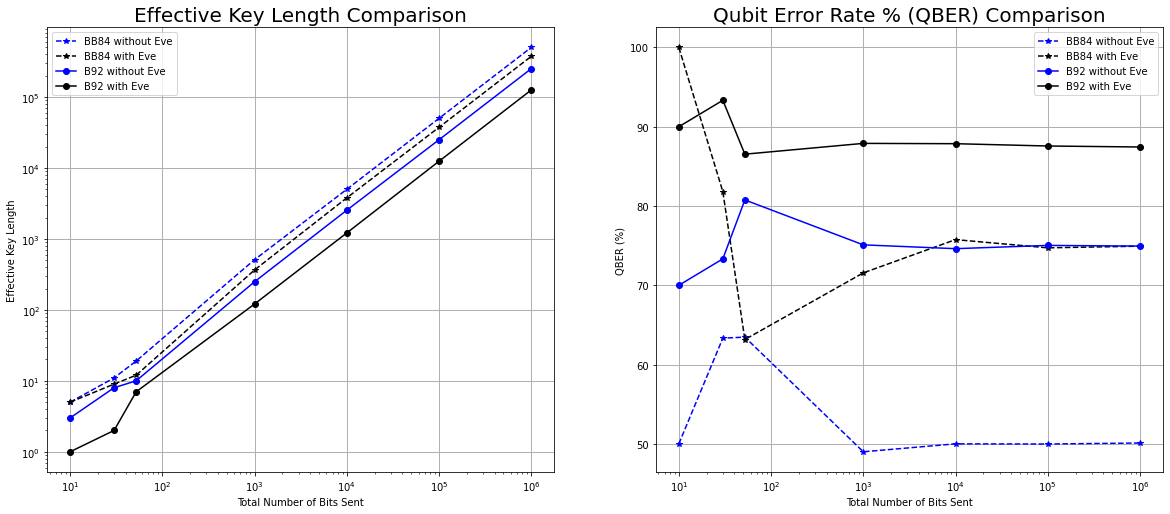

In [12]:
protocol_comparison = plt.figure(figsize=(20,18))
err = protocol_comparison.add_subplot(222)
err.set_title('Qubit Error Rate % (QBER) Comparison', fontsize=20)
err.plot(trial_sizes, error_bb84, 'b', linestyle='--', marker='*', label='BB84 without Eve')
err.plot(trial_sizes, error_bb84_eve, 'black', linestyle='--', marker='*', label='BB84 with Eve')
err.plot(trial_sizes, error_b92, 'b', marker='o', label='B92 without Eve')
err.plot(trial_sizes, error_b92_eve, 'black', marker='o',  label='B92 with Eve')
err.set_xlabel("Total Number of Bits Sent", fontsize=10)
err.set_ylabel("QBER (%)", fontsize=10)
err.set_xscale('log')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
err.grid(linestyle='-', linewidth=1)
err.legend()

key = protocol_comparison.add_subplot(221)
key.set_title('Effective Key Length Comparison', fontsize=20)
key.plot(trial_sizes, key_len_bb84, 'b', linestyle='--', marker='*', label='BB84 without Eve')
key.plot(trial_sizes, key_len_bb84_eve, 'black', linestyle='--', marker='*', label='BB84 with Eve')
key.plot(trial_sizes, key_len_b92, 'b', marker='o', label='B92 without Eve')
key.plot(trial_sizes, key_len_b92_eve, 'black', marker='o', label='B92 with Eve')
key.set_xlabel("Total Number of Bits Sent", fontsize=10)
key.set_ylabel("Effective Key Length", fontsize=10)
key.set_xscale('log')
key.set_yscale('log')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
key.grid(linestyle='-', linewidth=1)
key.legend()

plt.show()